In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# pwd = os.getcwd()
# filepath = pwd + "\\skater_stats.csv"
# data = pd.read_csv(filepath,encoding='latin-1')

C:\Users\krist\AppData\Local\Temp\ipykernel_17388\4019381976.py:3: DtypeWarning: Columns (8,9,11,29,48,49,55,56,59,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath,encoding='latin-1')


In [3]:
# Shape of the current dataset.
data.shape

(71251, 90)

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [5]:
# Displaying top 5 results by index.
data.head()

,Season,Game_Type,Player_ID,Player_Name,Hof,Age,Team_ID,Team_Name,Team_Bkdwn_Flag,Seas_Sum_Flag,Pos1,Pos2,GP,G,A,PTS,PlusMinus,PIM,PS,esG,ppG,shG,GWG,esA,ppA,shA,S,S_Pct,TOI,Avg_TOI,BLK,HIT,FOW,FOL,FO_Pct,esCF,esCA,esCF_Pct,esRelCF_Pct,esFF,esFA,esFF_Pct,esRelFF_Pct,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TOI_per60,esTOI_per60,TK,GV,xPlusMinus,TSA,SAThruToNet_Pct,Avg_ShiftLength_perGm,esTOI_perGm,esGF_per60,esGA_per60,ppTOI_perGm,ppRelCF_Pct,ppGF_per60,ppGA_per60,shTOI_perGm,shRelCF_Pct,shGF_per60,shGA_per60,GC,G_perGm,A_perGm,PTS_perGm,GC_perGm,PIM_perGm,S_perGm,adjG,adjA,adjPTS,adjGC,oiTGF,oiPPGF,oiTGA,oiPKGA,xGF,xGA,OPS,DPS,soAtt,soMade,soMiss,soPct
0,1918,REG,adamsja01,Jack Adams,True,23,TRA,Toronto Arenas,False,False,C,NaN,8.0,0,0,0,NaN,31.0,-0.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,3.88,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.7,0.2,NaN,NaN,NaN,NaN
1,1918,REG,bellbi01,Billy Bell,False,26,TOT,Total,False,True,F,NaN,9.0,1,0,1,NaN,6.0,-0.3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.11,0.00,0.11,0.10,0.67,NaN,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,0.3,NaN,NaN,NaN,NaN
2,1918,REG,bellbi01,Billy Bell,False,26,MTL,Montreal Canadiens,True,False,F,NaN,7.0,0,0,0,NaN,6.0,-0.3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.86,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,0.3,NaN,NaN,NaN,NaN
3,1918,REG,bellbi01,Billy Bell,False,26,MTW,Montreal Wanderers,True,False,F,NaN,2.0,1,0,1,NaN,0.0,0.1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.50,0.00,0.50,0.45,0.00,NaN,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.1,NaN,NaN,NaN,NaN
4,1918,REG,berlilo01,Louis Berlinguette,False,30,MTL,Montreal Canadiens,False,False,LW,NaN,20.0,2,1,3,NaN,12.0,-0.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.10,0.05,0.15,0.11,0.60,NaN,2.0,5.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.3,0.8,NaN,NaN,NaN,NaN


In [6]:
# In this analysis I´m mostly interested in regular season games played between seasons 2015-2022 with minimum 20 games played per player.
data = data[(data["Season"] >= 2015) & (data["Game_Type"] == "REG") & (data["GP"] >= 20)]

In [7]:
data = data.reset_index(drop=True)

In [8]:
data.head()

,Season,Game_Type,Player_ID,Player_Name,Hof,Age,Team_ID,Team_Name,Team_Bkdwn_Flag,Seas_Sum_Flag,Pos1,Pos2,GP,G,A,PTS,PlusMinus,PIM,PS,esG,ppG,shG,GWG,esA,ppA,shA,S,S_Pct,TOI,Avg_TOI,BLK,HIT,FOW,FOL,FO_Pct,esCF,esCA,esCF_Pct,esRelCF_Pct,esFF,esFA,esFF_Pct,esRelFF_Pct,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TOI_per60,esTOI_per60,TK,GV,xPlusMinus,TSA,SAThruToNet_Pct,Avg_ShiftLength_perGm,esTOI_perGm,esGF_per60,esGA_per60,ppTOI_perGm,ppRelCF_Pct,ppGF_per60,ppGA_per60,shTOI_perGm,shRelCF_Pct,shGF_per60,shGA_per60,GC,G_perGm,A_perGm,PTS_perGm,GC_perGm,PIM_perGm,S_perGm,adjG,adjA,adjPTS,adjGC,oiTGF,oiPPGF,oiTGA,oiPKGA,xGF,xGA,OPS,DPS,soAtt,soMade,soMiss,soPct
0,2015,REG,abdelju01,Justin Abdelkader,False,27,DET,Detroit Red Wings,False,False,LW,NaN,71.0,23,21,44,3.0,72.0,5.6,15.0,8.0,0.0,5.0,15.0,6.0,0.0,154.0,14.9,1272.0,17:55,28.0,153.0,7.0,8.0,46.7,909.0,704.0,56.4,4.0,668.0,540.0,55.3,4.1,9.7,90.5,100.2,63.6,36.4,17:55,14:10,16.0,29.0,9.7,237.0,65.0,0:38,14:09,2.9,2.3,2:48,-2.2,9.7,2.1,0:56,1.9,0.0,4.5,18.0,0.32,0.30,0.62,0.25,1.01,2.17,26.0,23.0,49.0,20.0,80.0,32.0,50.0,5.0,39.1,29.3,4.0,1.6,0.0,NaN,NaN,NaN
1,2015,REG,adamscr01,Craig Adams,False,37,PIT,Pittsburgh Penguins,False,False,RW,NaN,70.0,1,6,7,-1.0,44.0,-0.3,1.0,0.0,0.0,1.0,5.0,0.0,1.0,51.0,2.0,682.0,9:45,29.0,183.0,17.0,23.0,42.5,363.0,396.0,47.8,-6.3,268.0,292.0,47.9,-6.6,5.6,93.7,99.2,50.0,50.0,9:45,7:10,6.0,7.0,-3.4,76.0,67.1,0:28,7:09,1.3,1.6,0:02,11.8,0.0,0.0,2:33,-1.4,0.7,5.0,2.0,0.01,0.09,0.10,0.03,0.63,0.73,1.0,7.0,8.0,2.0,13.0,0.0,28.0,15.0,14.6,18.0,-1.0,0.8,0.0,NaN,NaN,NaN
2,2015,REG,alzneka01,Karl Alzner,False,26,WSH,Washington Capitals,False,False,D,NaN,82.0,5,16,21,14.0,20.0,5.4,5.0,0.0,0.0,0.0,16.0,0.0,0.0,72.0,6.9,1593.0,19:26,165.0,120.0,0.0,0.0,NaN,1239.0,1204.0,50.7,-0.9,883.0,862.0,50.6,-1.4,8.7,93.2,101.9,49.5,50.5,19:26,17:06,15.0,35.0,4.7,171.0,42.7,0:41,17:13,2.3,1.8,0:01,11.7,0.0,0.0,2:11,3.0,0.7,4.6,7.0,0.06,0.20,0.26,0.08,0.24,0.88,6.0,17.0,23.0,8.0,55.0,0.0,56.0,14.0,53.0,48.3,0.9,4.5,1.0,0.0,1.0,0.0
3,2015,REG,anderjo03,Joakim Andersson,False,25,DET,Detroit Red Wings,False,False,C,NaN,68.0,3,5,8,-4.0,22.0,-0.3,3.0,0.0,0.0,1.0,5.0,0.0,0.0,74.0,4.1,791.0,11:38,24.0,27.0,192.0,183.0,51.2,434.0,556.0,43.8,-11.8,325.0,411.0,44.2,-9.8,6.0,93.5,99.5,38.8,61.2,11:38,9:21,8.0,13.0,-8.6,103.0,71.8,0:38,9:21,1.4,2.0,0:06,-28.2,0.0,0.0,2:09,4.4,0.8,4.9,3.0,0.04,0.07,0.12,0.04,0.32,1.09,3.0,5.0,8.0,3.0,17.0,0.0,33.0,12.0,17.8,26.4,-1.0,0.7,0.0,NaN,NaN,NaN
4,2015,REG,anisiar01,Artem Anisimov,False,26,CBJ,Columbus Blue Jackets,False,False,C,NaN,52.0,7,20,27,-6.0,8.0,2.0,7.0,0.0,0.0,2.0,13.0,4.0,3.0,88.0,8.0,852.0,16:23,26.0,33.0,102.0,127.0,44.5,608.0,586.0,50.9,3.2,459.0,449.0,50.6,3.0,9.0,89.3,98.3,44.7,55.3,16:22,12:45,24.0,21.0,-1.8,175.0,50.3,0:50,12:45,2.7,3.4,1:36,-1.8,4.3,0.7,2:00,5.4,1.7,6.9,9.0,0.13,0.38,0.52,0.17,0.15,1.69,8.0,22.0,30.0,10.0,39.0,6.0,51.0,12.0,27.4,29.1,1.4,0.6,3.0,0.0,3.0,0.0


In [9]:
# Displaying columns of the dataset.
data.columns

Index(['Season', 'Game_Type', 'Player_ID', 'Player_Name', 'Hof', 'Age',
       'Team_ID', 'Team_Name', 'Team_Bkdwn_Flag', 'Seas_Sum_Flag', 'Pos1',
       'Pos2', 'GP', 'G', 'A', 'PTS', 'PlusMinus', 'PIM', 'PS', 'esG', 'ppG',
       'shG', 'GWG', 'esA', 'ppA', 'shA', 'S', 'S_Pct', 'TOI', 'Avg_TOI',
       'BLK', 'HIT', 'FOW', 'FOL', 'FO_Pct', 'esCF', 'esCA', 'esCF_Pct',
       'esRelCF_Pct', 'esFF', 'esFA', 'esFF_Pct', 'esRelFF_Pct', 'oiSH_Pct',
       'oiSV_Pct', 'PDO', 'oZS_Pct', 'dZS_Pct', 'TOI_per60', 'esTOI_per60',
       'TK', 'GV', 'xPlusMinus', 'TSA', 'SAThruToNet_Pct',
       'Avg_ShiftLength_perGm', 'esTOI_perGm', 'esGF_per60', 'esGA_per60',
       'ppTOI_perGm', 'ppRelCF_Pct', 'ppGF_per60', 'ppGA_per60', 'shTOI_perGm',
       'shRelCF_Pct', 'shGF_per60', 'shGA_per60', 'GC', 'G_perGm', 'A_perGm',
       'PTS_perGm', 'GC_perGm', 'PIM_perGm', 'S_perGm', 'adjG', 'adjA',
       'adjPTS', 'adjGC', 'oiTGF', 'oiPPGF', 'oiTGA', 'oiPKGA', 'xGF', 'xGA',
       'OPS', 'DPS', 'soAtt', 'so

In [10]:
# Sorting the columns I´m interested in.
data = data[['Season','Player_Name','Age',
       'Team_ID', 'Team_Name','Pos1','GP', 'G', 'A', 'PTS', 'PlusMinus', 'PIM','PS', 'esG', 'ppG',
       'shG', 'GWG', 'esA', 'ppA', 'shA', 'S', 'S_Pct', 'TOI', 'Avg_TOI','BLK', 'HIT', 'FOW', 'FOL','xGF', 'xGA',]]

In [11]:
# Checking for null values.
data.isna().sum()

Season          0
Player_Name     0
Age             0
Team_ID         0
Team_Name      24
Pos1            0
GP              0
G               0
A               0
PTS             0
PlusMinus       0
PIM             0
PS              0
esG             0
ppG             0
shG             0
GWG             0
esA             0
ppA             0
shA             0
S               0
S_Pct           0
TOI             0
Avg_TOI         0
BLK             0
HIT             0
FOW             0
FOL             0
xGF             0
xGA             0
dtype: int64

In [12]:
# Checking which Team_Name has null values.
data["Team_ID"][data["Team_Name"].isna()].unique()

array(['SEA'], dtype=object)

In [13]:
# Assigning Team_Name based on Team_ID.
data["Team_Name"].fillna("Seattle Kraken", inplace=True)

In [14]:
print("Dataset shape = {}\n".format(data.shape))
data.info()

Dataset shape = (6029, 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6029 entries, 0 to 6028
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       6029 non-null   int64  
 1   Player_Name  6029 non-null   object 
 2   Age          6029 non-null   int64  
 3   Team_ID      6029 non-null   object 
 4   Team_Name    6029 non-null   object 
 5   Pos1         6029 non-null   object 
 6   GP           6029 non-null   float64
 7   G            6029 non-null   int64  
 8   A            6029 non-null   int64  
 9   PTS          6029 non-null   int64  
 10  PlusMinus    6029 non-null   float64
 11  PIM          6029 non-null   float64
 12  PS           6029 non-null   float64
 13  esG          6029 non-null   float64
 14  ppG          6029 non-null   float64
 15  shG          6029 non-null   float64
 16  GWG          6029 non-null   float64
 17  esA          6029 non-null   float64
 18  ppA          6029 no

In [15]:
# Basic descriptive statistics of the numeric columns.
data.describe()

,Season,Age,GP,G,A,PTS,PlusMinus,PIM,PS,esG,ppG,shG,GWG,esA,ppA,shA,S,S_Pct,TOI,BLK,HIT,FOW,FOL,xGF,xGA
count,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000,6029.000000
mean,2018.507381,26.874606,58.430917,9.418477,15.792669,25.211146,-0.551501,28.156079,2.992636,7.239675,1.914248,0.264555,1.488472,11.876099,3.642063,0.274507,100.784873,8.455996,969.297894,45.697296,73.618676,96.787859,96.640239,32.871654,32.735296
std,2.295986,4.255587,18.725785,8.733551,12.632988,19.751652,11.292054,22.112520,2.687641,6.312697,2.996809,0.661912,1.839912,8.291456,5.299766,0.606410,61.334085,4.864636,439.750569,37.630138,51.359582,187.994759,175.272578,16.156035,14.753199
min,2015.000000,18.000000,20.000000,0.000000,0.000000,0.000000,-47.000000,0.000000,-1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,122.000000,1.000000,1.000000,0.000000,0.000000,1.400000,3.800000
25%,2017.000000,24.000000,44.000000,3.000000,6.000000,10.000000,-7.000000,13.000000,0.900000,2.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,52.000000,4.800000,605.000000,20.000000,36.000000,0.000000,0.000000,19.500000,21.100000
50%,2019.000000,26.000000,61.000000,7.000000,12.000000,20.000000,-1.000000,23.000000,2.300000,6.000000,1.000000,0.000000,1.000000,10.000000,1.000000,0.000000,89.000000,8.100000,961.000000,33.000000,61.000000,4.000000,8.000000,32.000000,32.400000
75%,2020.000000,30.000000,75.000000,14.000000,22.000000,36.000000,6.000000,37.000000,4.500000,10.000000,3.000000,0.000000,2.000000,17.000000,5.000000,0.000000,137.000000,11.700000,1301.000000,60.000000,98.000000,87.000000,101.000000,44.900000,43.200000
max,2022.000000,45.000000,84.000000,60.000000,87.000000,128.000000,64.000000,238.000000,15.300000,44.000000,26.000000,7.000000,12.000000,56.000000,34.000000,6.000000,398.000000,46.200000,2378.000000,283.000000,382.000000,1273.000000,935.000000,86.800000,82.200000


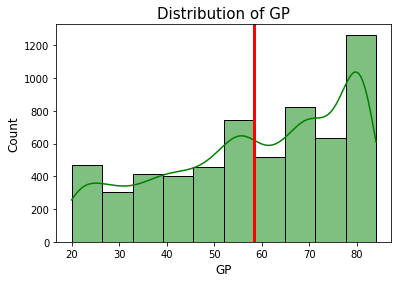

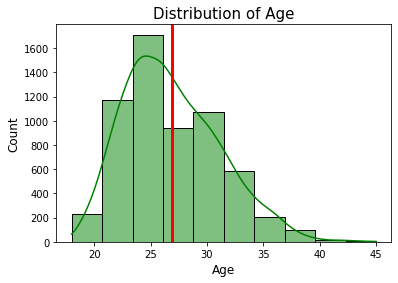

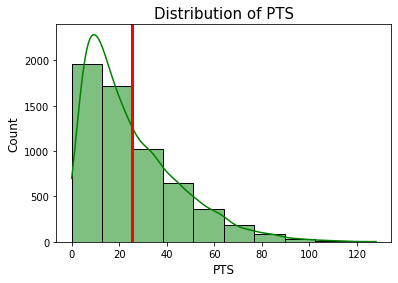

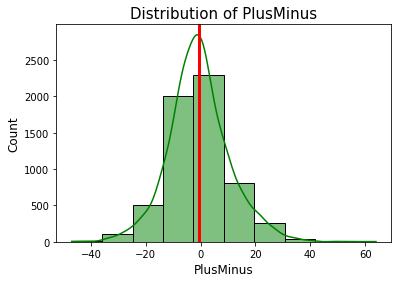

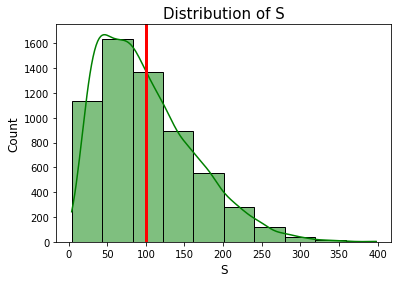

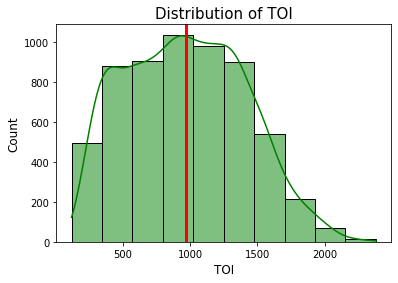

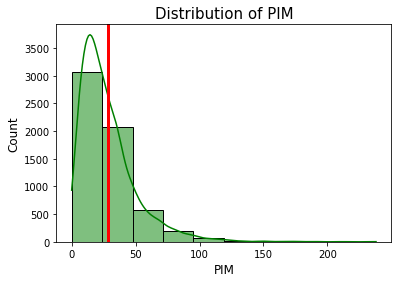

In [16]:
# Looking at the distribution of certain columns with their perspective averages.
xd = ["GP","Age","PTS","PlusMinus","S","TOI","PIM"]
for i in xd:
    sns.histplot(x=i, data=data, color="g", kde=True, bins=10)
    plt.title("Distribution of " + i, fontsize=15)
    plt.xlabel(i, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.axvline(data[i].sum()/data[i].count(), linewidth=3, c="r", label="Average")
    plt.show()

In [17]:
# Checking unique values in column Games played. Regular season in NHL has 82 games, this dataset has players that played more than that so I have to sort it out.
data["GP"].unique()

array([71., 70., 82., 68., 52., 77., 36., 27., 78., 31., 80., 47., 37.,
       62., 64., 65., 49., 81., 73., 59., 56., 39., 67., 60., 72., 45.,
       41., 21., 53., 75., 63., 51., 38., 29., 69., 30., 44., 57., 20.,
       33., 40., 76., 61., 58., 74., 24., 43., 54., 55., 50., 32., 23.,
       35., 79., 42., 26., 66., 34., 25., 48., 46., 22., 28., 84., 83.])

In [18]:
# Looking for players that played more than 82 games, the problem was with players that were traded during the regular season and their stats from multiple teams were summed together in a new row.
data[data["GP"] > 82]

,Season,Player_Name,Age,Team_ID,Team_Name,Pos1,GP,G,A,PTS,PlusMinus,PIM,PS,esG,ppG,shG,GWG,esA,ppA,shA,S,S_Pct,TOI,Avg_TOI,BLK,HIT,FOW,FOL,xGF,xGA
739,2015,Keith Yandle,28,TOT,Total,D,84.0,6,46,52,-26.0,40.0,6.6,4.0,2.0,0.0,2.0,19.0,27.0,0.0,232.0,2.6,1925.0,22:55,101.0,53.0,0.0,0.0,59.2,70.1
746,2015,Marek Zidlicky,37,TOT,Total,D,84.0,7,27,34,-9.0,56.0,6.0,1.0,6.0,0.0,1.0,13.0,14.0,0.0,130.0,5.4,1760.0,20:57,92.0,95.0,0.0,1.0,54.1,60.8
1188,2016,Jamie McGinn,27,TOT,Total,LW,84.0,22,17,39,-7.0,33.0,5.0,13.0,9.0,0.0,5.0,14.0,3.0,0.0,156.0,14.1,1201.0,14:18,27.0,164.0,4.0,3.0,34.7,33.9
1397,2016,Eric Staal,31,TOT,Total,C,83.0,13,26,39,-3.0,34.0,3.4,12.0,1.0,0.0,0.0,20.0,6.0,0.0,199.0,6.5,1540.0,18:33,33.0,74.0,446.0,396.0,58.7,46.5
3230,2019,Kevin Fiala,22,TOT,Total,LW,83.0,13,26,39,-23.0,36.0,2.4,11.0,2.0,0.0,2.0,17.0,9.0,0.0,174.0,7.5,1298.0,15:38,20.0,42.0,3.0,5.0,49.6,52.2
3310,2019,Ryan Hartman,24,TOT,Total,RW,83.0,12,14,26,1.0,74.0,2.1,12.0,0.0,0.0,2.0,14.0,0.0,0.0,145.0,8.3,1089.0,13:07,39.0,107.0,4.0,12.0,41.6,48.7
3594,2019,Marcus Pettersson,22,TOT,Total,D,84.0,2,23,25,17.0,66.0,5.0,1.0,1.0,0.0,0.0,18.0,4.0,1.0,87.0,2.3,1401.0,16:41,108.0,101.0,1.0,0.0,52.6,48.0


In [19]:
# Team_ID with value TOT means Season Total for players that were traded during the season. I want to delete those rows as we have their separate stats in other rows for that particular season.
data = data[data["Team_ID"] != "TOT"]

In [20]:
# Quick stats of the last 7 seasons.
print("Most goals scored during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"G":"sum"}).sort_values(by="G", ascending=False).head(1))
print("Most hits during the last 7 seasons had: ", data.groupby(["Player_Name","Team_ID"]).agg({"HIT":"sum"}).sort_values(by="HIT", ascending=False).head(1))
print("Most penalty minutes during the last 7 seasons had: ", data.groupby(["Player_Name","Team_ID"]).agg({"PIM":"sum"}).sort_values(by="PIM", ascending=False).head(1))
print("Most blocked shots during the last 7 seasons had: ", data.groupby(["Player_Name","Team_ID"]).agg({"BLK":"sum"}).sort_values(by="BLK", ascending=False).head(1))
print("Most shots during the last 7 seasons had: ", data.groupby(["Player_Name","Team_ID"]).agg({"S":"sum"}).sort_values(by="S", ascending=False).head(1))
print("Most minutes played during the last 7 seasons had: ", data.groupby(["Player_Name","Team_ID"]).agg({"TOI":"sum"}).sort_values(by="TOI", ascending=False).head(1))
print("Most faceoffs won during the last 7 seasons had: ", data.groupby(["Player_Name","Team_ID"]).agg({"FOW":"sum"}).sort_values(by="FOW", ascending=False).head(1))
print("Oldest player to play during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"Age":"max"}).sort_values(by="Age", ascending=False).head(1))
print("Most games played during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"GP":"sum"}).sort_values(by="GP", ascending=False).head(1))


Most goals scored during the last 7 seasons:                           G
Player_Name   Team_ID     
Alex Ovechkin WSH      358
Most hits during the last 7 seasons had:                              HIT
Player_Name     Team_ID        
Cal Clutterbuck NYI      1835.0
Most penalty minutes during the last 7 seasons had:                          PIM
Player_Name Team_ID        
Tom Wilson  WSH      1070.0
Most blocked shots during the last 7 seasons had:                          BLK
Player_Name Team_ID        
Roman Josi  NSH      1101.0
Most shots during the last 7 seasons had:                              S
Player_Name   Team_ID        
Alex Ovechkin WSH      2626.0
Most minutes played during the last 7 seasons had:                           TOI
Player_Name Team_ID         
Brent Burns SJS      15638.0
Most faceoffs won during the last 7 seasons had:                               FOW
Player_Name      Team_ID        
Patrice Bergeron BOS      7424.0
Oldest player to play during the last 7 se

In [21]:
# Teams with the most total points scored by their players during the last 7 seasons, sorted in descending order. Tampa Bay Lightning is first with 5326 points.
data.groupby("Team_ID")["PTS"].sum().sort_values(ascending=False).reset_index()

,Team_ID,PTS
0,TBL,5326
1,WSH,5199
2,PIT,5119
3,TOR,5067
4,FLA,4984
5,STL,4953
6,CGY,4934
7,MIN,4913
8,WPG,4890
9,COL,4839


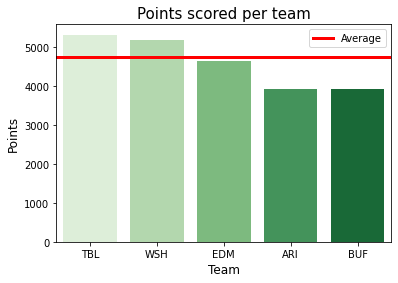

In [22]:
# Points scored per team in a barplot with 2 most best teams, 2 worst teams and 1 team that was in the middle of our list. (2xpansion teams excluded.)
sns.barplot(x="Team_ID", y="PTS", data=data[data["Team_ID"].isin(["TBL", "WSH", "EDM","ARI","BUF"])], estimator=sum, palette="Greens", ci=False, order=["TBL", "WSH", "EDM","ARI","BUF"])
plt.title("Points scored per team", fontsize=15)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Points", fontsize=12)
plt.axhline(data["PTS"].sum()/(len(data["Team_ID"].unique()) - 2), linewidth=3, c="r", label="Average")
plt.legend()
plt.show()

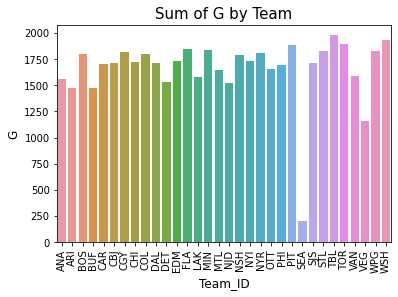

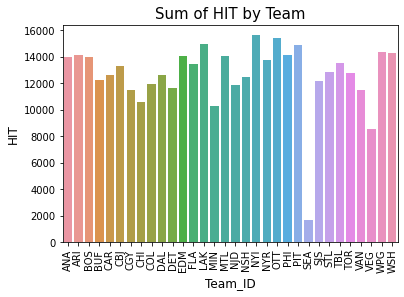

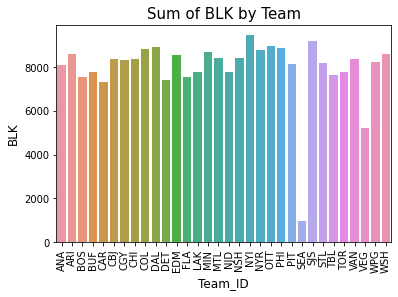

In [23]:
cols = ["G", "HIT","BLK"]
for s in cols:
    sns.barplot(x="Team_ID", y=s, data=data.sort_values(by="Team_ID"), estimator=sum, ci=False)
    plt.title("Sum of " + s + " by Team", fontsize=15)
    plt.xlabel("Team_ID", fontsize=12)
    plt.ylabel(s, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

In [24]:
cols = ["G", "HIT","BLK"]
for s in cols:
    print("Most " + s + " overall:")
    print(data.groupby("Team_ID").agg({s:"sum"}).sort_values(by=s, ascending=False).head(5), "\n")
    print("Least " + s + " overall:")
    print(data.groupby("Team_ID").agg({s:"sum"}).sort_values(by=s, ascending=True).head(5), "\n")

Most G overall:
            G
Team_ID      
TBL      1979
WSH      1934
TOR      1890
PIT      1888
FLA      1849 

Least G overall:
            G
Team_ID      
SEA       199
VEG      1160
ARI      1474
BUF      1475
NJD      1525 

Most HIT overall:
             HIT
Team_ID         
NYI      15627.0
OTT      15391.0
LAK      14938.0
PIT      14856.0
WPG      14325.0 

Least HIT overall:
             HIT
Team_ID         
SEA       1672.0
VEG       8550.0
MIN      10262.0
CHI      10599.0
CGY      11460.0 

Most BLK overall:
            BLK
Team_ID        
NYI      9472.0
SJS      9196.0
OTT      8953.0
DAL      8940.0
PHI      8859.0 

Least BLK overall:
            BLK
Team_ID        
SEA       984.0
VEG      5211.0
CAR      7331.0
DET      7425.0
FLA      7537.0 



In [25]:
cols = ["G", "HIT","BLK"]
for s in cols:
    print("Most " + s + " in one season had:")
    print(data.groupby(["Player_Name", "Season"]).agg({s:"max"}).sort_values(by=s, ascending=False).head(6), "\n")

Most G in one season had:
                         G
Player_Name     Season    
Auston Matthews 2022    60
Leon Draisaitl  2022    55
Alex Ovechkin   2015    53
Chris Kreider   2022    52
Alex Ovechkin   2019    51
                2016    50 

Most HIT in one season had:
                          HIT
Player_Name     Season       
Matt Martin     2015    382.0
                2016    365.0
Mark Borowiecki 2017    364.0
Radko Gudas     2022    355.0
Cal Clutterbuck 2015    343.0
Tanner Jeannot  2022    318.0 

Most BLK in one season had:
                              BLK
Player_Name         Season       
Kris Russell        2015    283.0
Francois Beauchemin 2016    256.0
Kris Russell        2018    223.0
                    2017    213.0
Roman Josi          2015    209.0
Andy Greene         2019    208.0 



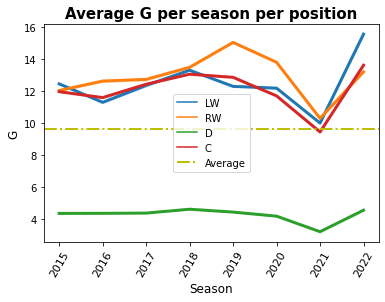

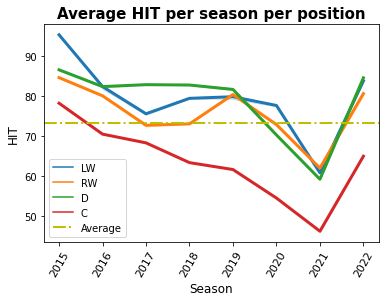

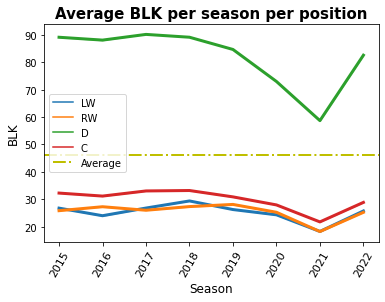

In [26]:
for s in cols:
    sns.lineplot(x="Season", y=s, data=data[data["Pos1"].isin(["D","C","LW","RW"])], hue="Pos1", ci=False, linewidth=3)
    plt.title("Average " + s + " per season per position", fontsize=15, fontweight="bold")
    plt.xlabel("Season", fontsize=12)
    plt.ylabel(s, fontsize=12)
    plt.xticks(rotation=60, fontsize=11)
    plt.axhline(data[s].mean(),0,1,linewidth=2, c="y", linestyle="-.", label="Average")
    plt.legend()
    plt.show()

In [27]:
# I want to know which players contributed the most to total points scored by Tampa Bay Lightning, Nikita Kucherov led them with 598 points.
data[data["Team_ID"] == "TBL"].groupby("Player_Name").agg({"PTS":"sum"}).sort_values(by="PTS", ascending=False).reset_index().head(5)

,Player_Name,PTS
0,Nikita Kucherov,598
1,Steven Stamkos,526
2,Victor Hedman,459
3,Brayden Point,368
4,Ondrej Palat,360


In [28]:
# Which players scored the most points during 1 season? Again, Nikita Kucherov is on the first place with 122 points in season 2019. Steven Stamkos scored the most goals, 42.
tbltop5seasons = data[["Player_Name", "Team_ID", "Pos1", "G", "A", "PTS", "Avg_TOI", "Season"]][data["Team_ID"] == "TBL"].sort_values(by="PTS", ascending=False).reset_index().head(20)
tbltop5seasons

,index,Player_Name,Team_ID,Pos1,G,A,PTS,Avg_TOI,Season
0,3412,Nikita Kucherov,TBL,RW,41,87,128,19:58,2019
1,5924,Steven Stamkos,TBL,C,42,64,106,18:29,2022
2,2613,Nikita Kucherov,TBL,RW,39,61,100,19:49,2018
3,3712,Steven Stamkos,TBL,C,45,53,98,18:18,2019
4,3603,Brayden Point,TBL,C,41,51,92,18:55,2019
5,2909,Steven Stamkos,TBL,C,27,59,86,18:46,2018
6,4182,Nikita Kucherov,TBL,RW,33,52,85,18:52,2020
7,5526,Victor Hedman,TBL,D,20,65,85,25:05,2022
8,1861,Nikita Kucherov,TBL,RW,40,45,85,19:26,2017
9,646,Steven Stamkos,TBL,C,43,29,72,19:22,2015


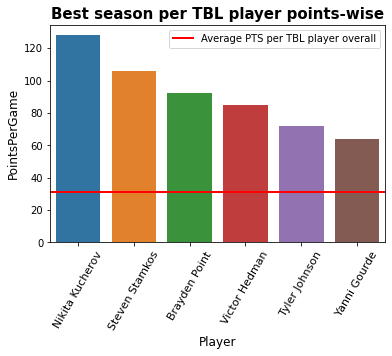

In [29]:
sns.barplot(x="Player_Name",y="PTS",data=tbltop5seasons, estimator=max, ci=False)
plt.title("Best season per TBL player points-wise", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("PointsPerGame", fontsize=12)
plt.xticks(rotation=60, fontsize=11)
plt.axhline(data["PTS"][data["Team_ID"] == "TBL"].mean(),0,1,linewidth=2, c="r", label="Average PTS per TBL player overall")
plt.legend()
plt.show()

In [30]:
# Listing top 10 players in the last 7 seasons based on their Points total.
top10 = data.groupby(["Player_Name","Team_ID"]).agg({"GP":"sum","G":"sum","A":"sum","PTS":"sum"}).sort_values(by="PTS", ascending=False).head(10)
top10.reset_index(inplace=True)
top10

,Player_Name,Team_ID,GP,G,A,PTS
0,Connor McDavid,EDM,487.0,239,458,697
1,Patrick Kane,CHI,592.0,252,435,687
2,Sidney Crosby,PIT,558.0,243,397,640
3,Leon Draisaitl,EDM,558.0,254,362,616
4,Brad Marchand,BOS,574.0,259,350,609
5,Johnny Gaudreau,CGY,601.0,209,399,608
6,Nikita Kucherov,TBL,510.0,237,361,598
7,Alex Ovechkin,WSH,595.0,358,238,596
8,Nathan MacKinnon,COL,556.0,218,367,585
9,Blake Wheeler,WPG,592.0,175,391,566


In [31]:
top10["PointsPerGame"] = (top10["PTS"])/(top10["GP"])
top10.sort_values(by="PointsPerGame", ascending=False)

,Player_Name,Team_ID,GP,G,A,PTS,PointsPerGame
0,Connor McDavid,EDM,487.0,239,458,697,1.431211
6,Nikita Kucherov,TBL,510.0,237,361,598,1.172549
1,Patrick Kane,CHI,592.0,252,435,687,1.160473
2,Sidney Crosby,PIT,558.0,243,397,640,1.146953
3,Leon Draisaitl,EDM,558.0,254,362,616,1.103943
4,Brad Marchand,BOS,574.0,259,350,609,1.060976
8,Nathan MacKinnon,COL,556.0,218,367,585,1.052158
5,Johnny Gaudreau,CGY,601.0,209,399,608,1.011647
7,Alex Ovechkin,WSH,595.0,358,238,596,1.001681
9,Blake Wheeler,WPG,592.0,175,391,566,0.956081


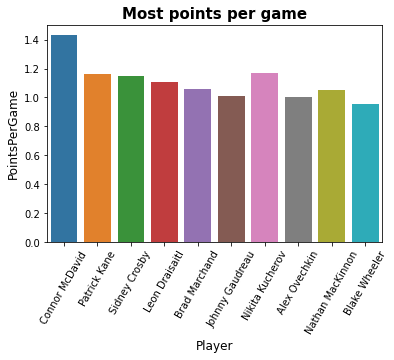

In [32]:
sns.barplot(x="Player_Name",y="PointsPerGame",data=top10)
plt.title("Most points per game", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("PointsPerGame", fontsize=12)
plt.xticks(rotation=60)
plt.show()

In [33]:
hits = data.groupby(["Player_Name","Team_ID"]).agg({"HIT":"sum"}).sort_values(by="HIT", ascending=False).head(10).reset_index()
hits

,Player_Name,Team_ID,HIT
0,Cal Clutterbuck,NYI,1835.0
1,Tom Wilson,WSH,1745.0
2,Matt Martin,NYI,1680.0
3,Adam Lowry,WPG,1535.0
4,Mark Borowiecki,OTT,1505.0
5,Alex Ovechkin,WSH,1500.0
6,Dustin Brown,LAK,1313.0
7,Rasmus Ristolainen,BUF,1289.0
8,Jordan Staal,CAR,1188.0
9,Nick Foligno,CBJ,1180.0


In [34]:
# I want to look more closely on some of the best defensemen that played in this time span. Namely Kris Letang, John Carlson and Roman Josi.
dmen = data[data["Player_Name"].isin(["Kris Letang", "John Carlson", "Roman Josi"])].groupby(["Player_Name", "Team_ID"]).agg({"G":["min","max","mean"],"A":["min","max","mean"],"PTS":["min","max","mean"], "GP":"mean"}).reset_index()

In [35]:
# Roman Josi has the best point average during the last 7 seasons while playing the most games as well, his points maximum is 96.
dmenunique = dmen["Player_Name"].unique()

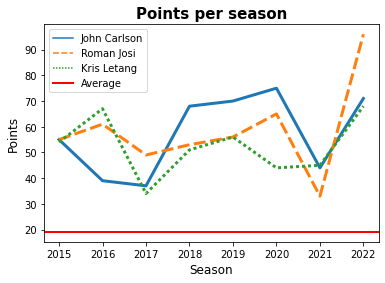

In [36]:
# Points per season of the 3 defensemen from the previous table in a linegraph. Roman Josi and Kris Letang had their career years in the last season.
sns.lineplot(x="Season", y="PTS", hue="Player_Name", data=data[data["Player_Name"].isin(dmenunique)], style="Player_Name", linewidth=3)
plt.title("Points per season", fontsize=15, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Points", fontsize=12)
plt.axhline(data["PTS"][data["Pos1"] == "D"].mean(),0,1,linewidth=2, c="r", label="Average")
plt.legend(fontsize=10)
plt.show()
